# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [4]:
import numpy as np
from scipy import optimize
from numpy import array 
from scipy import arange
import sympy as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt





# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

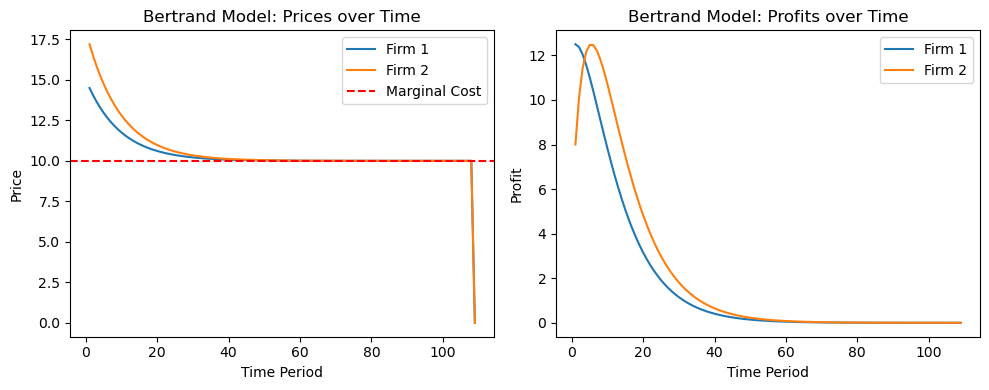

Equilibrium Period: 108


In [12]:
# Parameters
c = 10  # Marginal cost
T = 109  # Number of periods
a = 20 # Maximum price
b = 0.5 # Elasticity
price_change = 0.1  # Price change made by each firm after one period

# Starting prices for each firm
p1 = 15
p2 = 18

# Arrays to store prices and profits over time
prices1 = np.zeros(T)
prices2 = np.zeros(T)
profits1 = np.zeros(T)
profits2 = np.zeros(T)

# Define the objective function to minimize
def objective(prices):
    p1, p2 = prices
    q1 = a - p1*b
    q2 = a - p2*b
    profit1 = (p1 - c) * q1
    profit2 = (p2 - c) * q2
    return -(profit1 + profit2)  # We take the negative since we want to minimize later 

# Starting guess
initial_prices = np.array([p1, p2])

# Minimize the objective function
result = minimize(objective, initial_prices, method='SLSQP')

# Retrieve the equilibrium prices
equilibrium_prices = result.x

# Reaction function for each firm
def reaction(p1, p2):
    return (20 - p1) / 2, (20 - p2) / 2

# Initialize equilibrium_period variable
equilibrium_period = None

# Creating a Bertrand game
for t in range(T):
    q1, q2 = reaction(p1, p2)
    profits1[t] = (p1 - c) * q1
    profits2[t] = (p2 - c) * q2
    
    # Update the prices based on the price_change and the difference with marginal cost
    p1 -= price_change * (p1 - c)
    p2 -= price_change * (p2 - c)
    
    # Store the prices from each period
    prices1[t] = p1
    prices2[t] = p2

    # Check if prices equal the marginal cost 
    if np.isclose(p1, c) and np.isclose(p2, c):
        equilibrium_period = t + 1
        break # exits the simulation 

# Plot the prices and profits over time
time_periods = np.arange(1, T + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(time_periods, prices1, label='Firm 1')
plt.plot(time_periods, prices2, label='Firm 2')
plt.axhline(c, color='red', linestyle='--', label='Marginal Cost')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.title('Bertrand Model: Prices over Time')

plt.subplot(1, 2, 2)
plt.plot(time_periods, profits1, label='Firm 1')
plt.plot(time_periods, profits2, label='Firm 2')
plt.xlabel('Time Period')
plt.ylabel('Profit')
plt.legend()
plt.title('Bertrand Model: Profits over Time')

plt.tight_layout()
plt.show()

print("Equilibrium Period:", equilibrium_period)